### Introduction to visualization

The usual imports and we want to use `PathTreeBuilder` and `MoveTreeBuilder`.

In [1]:
%matplotlib inline
import openpathsampling as paths
from openpathsampling.visualize import PathTreeBuilder, PathTreeBuilder
from IPython.display import SVG, HTML
import openpathsampling.visualize as visualization

Let's load some data from our usual suspects the toy simulation.

In [2]:
st = paths.Storage('mstis.nc', mode='r')

Retrieve the move scheme and one of the transitions:

In [3]:
scheme = st.schemes[0]
transition = scheme.network.sampling_transitions[0]

In [4]:
print transition

TISTransition: Out B
B -> B or all states except B
Interface: 0.0<opB<0.04
Interface: 0.0<opB<0.09
Interface: 0.0<opB<0.16



In [5]:
transition.stateB.name

u'all states except B'

In [6]:
import openpathsampling.visualize as v

In [164]:
heritage = tree.construct_heritage(st.samples.last)

In [228]:
reload(v)

<module 'openpathsampling.visualize' from '/Users/jan-hendrikprinz/Studium/git/openpathsampling/openpathsampling/visualize.py'>

In [229]:
tree = v.PathTreeBuilder()

In [230]:
q = v.SampleList(heritage)

In [231]:
q.flip_time_direction = False

In [241]:
q.analyze()

In [233]:
subt = q[5].trajectory.shared_subtrajectory(q[6].trajectory)

In [234]:
q.samp_list[q[12]]

{'correlation': 0.18716577540106952,
 'length': 187,
 'length_bw': 152,
 'length_fw': 0,
 'length_shared': 35,
 'mover_type': openpathsampling.pathmover.BackwardShootMover,
 'new': False,
 'overlap_reversed': False,
 'shift': -115,
 'time_direction': 1}

In [214]:
q.decorrelated_trajectories

[Trajectory[56], Trajectory[104], Trajectory[162], Trajectory[177]]

In [242]:
q.correlation[0:5]

[0.0, 0.9107142857142857, 1.0, 0.0, 0.0]

In [243]:
for s in q:
    print q.index(s), hex(id(s)), '->', q.parent(s) if q.parent(s) is not None else '-', hex(id(q[q.parent(s)])) if q.parent(s) is not None else '0x000000000'

0 0x1227dea10 -> - 0x000000000
1 0x1227de910 -> 0 0x1227dea10
2 0x1227de610 -> 1 0x1227de910
3 0x1227de690 -> 2 0x1227de610
4 0x1227de950 -> 3 0x1227de690
5 0x1227dea50 -> 4 0x1227de950
6 0x1227de990 -> 5 0x1227dea50
7 0x12262d8d0 -> 6 0x1227de990
8 0x12262d4d0 -> 7 0x12262d8d0
9 0x12262d3d0 -> 8 0x12262d4d0
10 0x12262d350 -> 9 0x12262d3d0
11 0x1225589d0 -> 10 0x12262d350
12 0x12392d110 -> 11 0x1225589d0
13 0x12392dfd0 -> 12 0x12392d110
14 0x123c2d290 -> 13 0x12392dfd0
15 0x123c2d250 -> 14 0x123c2d290
16 0x123c2d210 -> 15 0x123c2d250
17 0x123c2d1d0 -> 16 0x123c2d210
18 0x123c2d190 -> 17 0x123c2d1d0
19 0x123c2d150 -> 18 0x123c2d190
20 0x123c2d110 -> 19 0x123c2d150
21 0x123c2d0d0 -> 20 0x123c2d110
22 0x123c2d090 -> 21 0x123c2d0d0
23 0x123c2d050 -> 22 0x123c2d090
24 0x12392df90 -> 23 0x123c2d050
25 0x12392d250 -> 24 0x12392df90
26 0x12392d210 -> 25 0x12392d250
27 0x12392d1d0 -> 26 0x12392d210
28 0x12392d290 -> 27 0x12392d1d0
29 0x12392d6d0 -> 28 0x12392d290


Now build a PathTreeBuilder using the storage with some settings and showing some states.
Blue is `stateA` and should be the first and last frame only unless the trajectory crosses to `stateB`
The Interfaces are indicated by shades of red. 

Finally the number in the snapshot references the stored index of associated configuration holding the coordinates.

In [33]:
tree = PathTreeBuilder()
tree.states = {
    'blue': transition.stateA
}

for no, interface in enumerate(transition.interfaces[0:]):
    tree.states['rgb(' + str(no*30) + ',0,0)'] = interface

tree.op = lambda snap : 'B' if snap.reversed else 'F'
tree.op = st.idx
tree.op = None
heritage = tree.construct_heritage(st.samples.last)
tree.samples = heritage
tree.options.analysis['joined_blocks'] = False

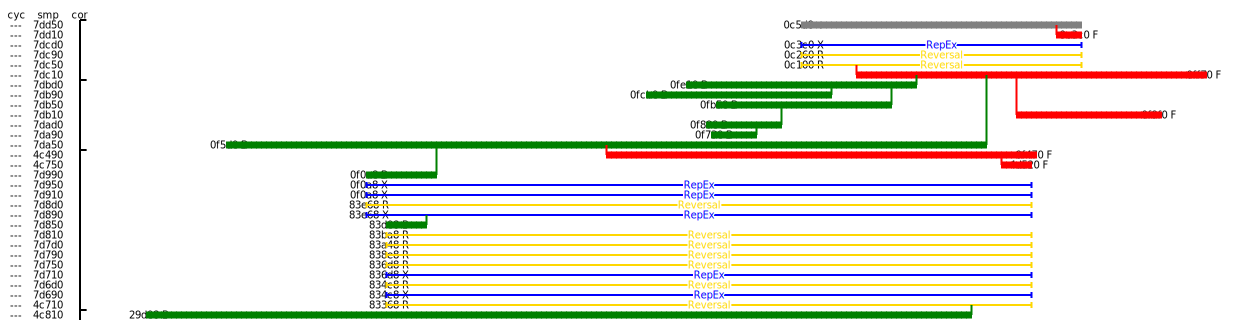

In [34]:
tree.options.analysis['flip_time_direction'] = False
tree.analyze()
SVG(tree.svg())

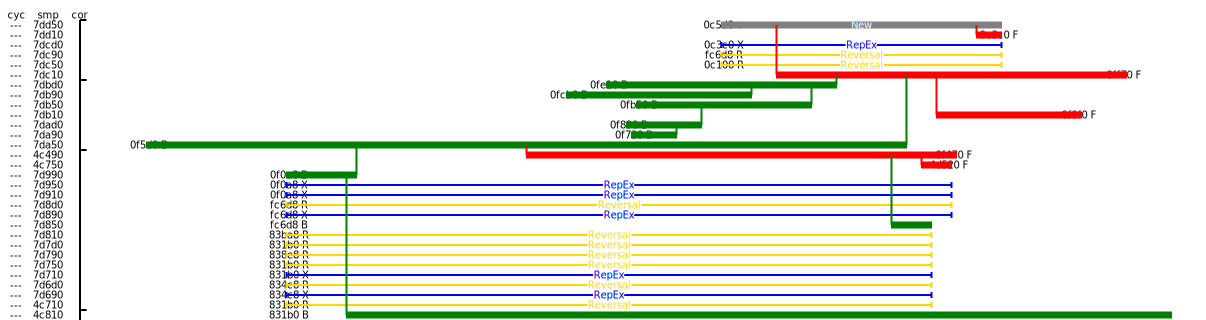

In [32]:
tree.options.analysis['flip_time_direction'] = True
tree.analyze()
SVG(tree.svg())

Next is the movetreebuilder

In [9]:
reload(visualization)
movevis = visualization.MoveTreeBuilder(st)

This shows the full movepath of all steps (right now this disables and only shows the first step!)

In [10]:
movevis.set_ensembles(scheme.ensembles_for_move_tree())
movevis.set_mover(scheme.root_mover)

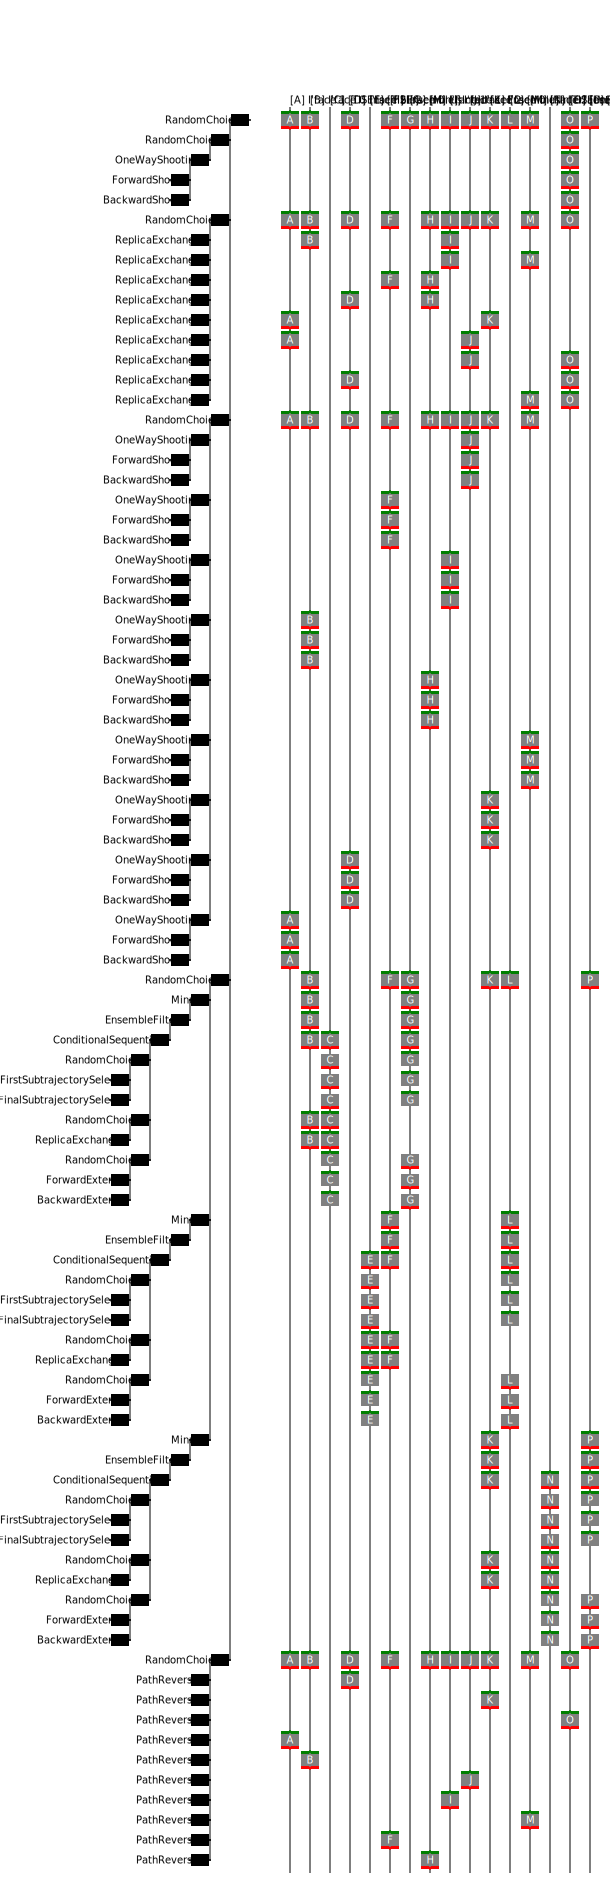

In [11]:
movevis.options['settings']['only_canonical'] = False
SVG(movevis.svg())